In [61]:
!pip install folium
import folium
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from datetime import datetime 
import requests #get request
import pandas as pd #pandas
import numpy as np #
import sqlite3
import matplotlib.pyplot as plt
import random 
import seaborn as sns


In [62]:
seattleCrime = pd.read_csv("SPD_Crime_Data__2008-Present.csv")

In [63]:
seattleCrime

Report Number   Offense ID Offense Start DateTime Offense End DateTime  \
0        2020-044620  12605873663    2020-02-05 10:10:00                  NaN   
1        2020-044452  12605598696    2020-02-03 08:00:00  2020-02-04 08:00:00   
2        2020-044465  12605567653    2020-02-02 20:30:00  2020-02-02 21:30:00   
3        2020-044225  12605174036    2020-02-05 01:17:00  2020-02-05 02:21:00   
4        2020-044121  12605097782    2020-02-04 22:41:00                  NaN   
...              ...          ...                    ...                  ...   
874064   2013-247888   7687554356    2013-07-13 01:00:00                  NaN   
874065   2013-227022   7682354808    2013-06-26 11:00:00  2013-06-29 06:30:00   
874066   2012-045494   7672915592    2012-02-14 15:04:00                  NaN   
874067   2010-328592   7692227482    2010-09-19 16:59:00                  NaN   
874068   2010-064656   7686420892    2010-02-25 18:00:00  2010-02-26 07:30:00   

            Report DateTime Group A B Crime Against Category  \
0       2020-02-05 11:24:31         A                SOCIETY   
1       2020-02-05 10:06:28         A               PROPERTY   
2       2020-02-05 09:39:33         A               PROPERTY   
3       2020-02-05 03:30:55         A               PROPERTY   
4       2020-02-05 00:59:41         A               PROPERTY   
...                     ...       ...                    ...   
874064  2013-07-13 06:37:00         A               PROPERTY   
874065  2013-06-29 09:43:00         A               PROPERTY   
874066  2012-02-14 15:04:00         A               PROPERTY   
874067  2010-09-19 16:59:00         A               PROPERTY   
874068  2010-02-26 07:54:00         A               PROPERTY   

                            Offense Parent Group  \
0                         DRUG/NARCOTIC OFFENSES   
1                                  LARCENY-THEFT   
2                                        ROBBERY   
3       DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
4       DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
...                                          ...   
874064                       MOTOR VEHICLE THEFT   
874065                       MOTOR VEHICLE THEFT   
874066                             LARCENY-THEFT   
874067                             LARCENY-THEFT   
874068                       MOTOR VEHICLE THEFT   

                                            Offense Offense Code Precinct  \
0                          Drug/Narcotic Violations          35A        W   
1       Theft of Motor Vehicle Parts or Accessories          23G        N   
2                                           Robbery          120        N   
3          Destruction/Damage/Vandalism of Property          290        W   
4          Destruction/Damage/Vandalism of Property          290        S   
...                                             ...          ...      ...   
874064                          Motor Vehicle Theft          240       SW   
874065                          Motor Vehicle Theft          240        W   
874066                                  Shoplifting          23C        N   
874067                                  Shoplifting          23C        W   
874068                          Motor Vehicle Theft          240        W   

       Sector Beat                 MCPP               100 Block Address  \
0           Q   Q1             MAGNOLIA        32XX BLOCK OF 23RD AVE W   
1           J   J3    ROOSEVELT/RAVENNA        63XX BLOCK OF 5TH AVE NE   
2           U   U3    ROOSEVELT/RAVENNA    26TH AVE NE / NE BLAKELEY ST   
3           Q   Q1             MAGNOLIA         22XX BLOCK OF W RAYE ST   
4           R   R1    NORTH BEACON HILL        25XX BLOCK OF 14TH AVE S   
...       ...  ...                  ...                             ...   
874064      F   F1         PIGEON POINT       41XX BLOCK OF 20TH AVE SW   
874065      Q   Q3           QUEEN ANNE           1ST AVE N / VALLEY ST   
874066      U   U1    ROOSEVELT/RAVENNA 

In [64]:
(seattleCrime['Crime Against Category']).unique()

array(['SOCIETY', 'PROPERTY', 'PERSON', 'NOT_A_CRIME'], dtype=object)

In [65]:
(seattleCrime['Offense Parent Group']).unique()

array(['DRUG/NARCOTIC OFFENSES', 'LARCENY-THEFT', 'ROBBERY',
       'DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY',
       'DRIVING UNDER THE INFLUENCE', 'FRAUD OFFENSES',
       'KIDNAPPING/ABDUCTION', 'COUNTERFEITING/FORGERY',
       'PORNOGRAPHY/OBSCENE MATERIAL', 'EXTORTION/BLACKMAIL',
       'MOTOR VEHICLE THEFT', 'SEX OFFENSES', 'STOLEN PROPERTY OFFENSES',
       'EMBEZZLEMENT', 'WEAPON LAW VIOLATIONS', 'ARSON',
       'HUMAN TRAFFICKING', 'LIQUOR LAW VIOLATIONS', 'BAD CHECKS',
       'PROSTITUTION OFFENSES', 'FAMILY OFFENSES, NONVIOLENT',
       'CURFEW/LOITERING/VAGRANCY VIOLATIONS', 'ANIMAL CRUELTY',
       'HOMICIDE OFFENSES', 'PEEPING TOM', 'SEX OFFENSES, CONSENSUAL',
       'DRUNKENNESS', 'BRIBERY', 'GAMBLING OFFENSES',
       'TRESPASS OF REAL PROPERTY', 'ASSAULT OFFENSES',
       'BURGLARY/BREAKING&ENTERING'], dtype=object)

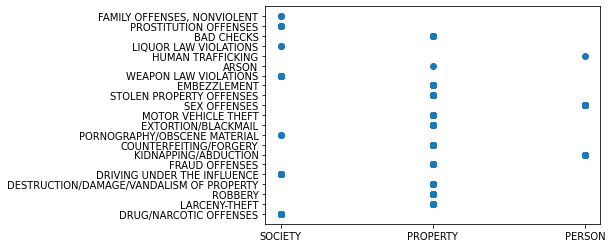

In [66]:
array_1=[]
array_2=[]
array_3=[]
for x in range(0,3000):
    array_1.append(seattleCrime.loc[x]['Offense Parent Group'])
    array_2.append(seattleCrime.loc[x]['Crime Against Category'])
    array_3.append(seattleCrime.loc[x]['Offense ID'])

plt.scatter(array_2,array_1)

In [67]:
seattleTidy = pd.read_csv("SPD_Crime_Data__2008-Present.csv")
seattleTidy.dropna(inplace=True)

In [68]:
seattleTidy=seattleTidy.drop("Offense End DateTime",axis=1)
seattleTidy=seattleTidy.drop("Offense Code",axis=1)

In [69]:
crimeCounts = sorted(seattleTidy["Offense Parent Group"].unique())
crimeCounts2=[]
temp_df = seattleTidy.copy()
index = 0

for ele in crimeCounts:
    crimeCounts2.append((ele, temp_df.groupby("Offense Parent Group").count()["Offense"][0:].values[index])) 
    index += 1

crimeCounts2 = sorted(crimeCounts2, key=lambda x: x[1], reverse = True)
crimeCounts2[0:10]

[('LARCENY-THEFT', 220201),
 ('BURGLARY/BREAKING&ENTERING', 62254),
 ('MOTOR VEHICLE THEFT', 45195),
 ('DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY', 42639),
 ('FRAUD OFFENSES', 35439),
 ('ASSAULT OFFENSES', 24189),
 ('TRESPASS OF REAL PROPERTY', 5015),
 ('ROBBERY', 4056),
 ('DRUG/NARCOTIC OFFENSES', 3846),
 ('BAD CHECKS', 2916)]

In [70]:
top_5_crimes = crimeCounts2[0:5]
top_5_crimes

[('LARCENY-THEFT', 220201),
 ('BURGLARY/BREAKING&ENTERING', 62254),
 ('MOTOR VEHICLE THEFT', 45195),
 ('DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY', 42639),
 ('FRAUD OFFENSES', 35439)]

In [71]:
time_format = "%Y-%m-%d %H:%M:%S"

for idx in seattleTidy.index:
    piInString=str(seattleTidy.at[idx,"Offense Start DateTime"])
    seattleTidy.at[idx,"Offense Start DateTime"] = datetime.strptime(piInString,time_format)
    seattleTidy.at[idx,"Report DateTime"] = datetime.strptime(seattleTidy.at[idx,"Report DateTime"],time_format)

seattleTidy.head()

Report Number   Offense ID Offense Start DateTime      Report DateTime  \
1   2020-044452  12605598696    2020-02-03 08:00:00  2020-02-05 10:06:28   
2   2020-044465  12605567653    2020-02-02 20:30:00  2020-02-05 09:39:33   
3   2020-044225  12605174036    2020-02-05 01:17:00  2020-02-05 03:30:55   
7   2020-044104  12605029468    2020-02-04 20:30:00  2020-02-04 23:31:52   
9   2020-044013  12605015456    2020-02-04 20:20:00  2020-02-04 22:28:09   

  Group A B Crime Against Category                      Offense Parent Group  \
1         A               PROPERTY                             LARCENY-THEFT   
2         A               PROPERTY                                   ROBBERY   
3         A               PROPERTY  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
7         A               PROPERTY  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
9         A               PROPERTY  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   

                                       Offense Precinct Sector Beat  \
1  Theft of Motor Vehicle Parts or Accessories        N      J   J3   
2                                      Robbery        N      U   U3   
3     Destruction/Damage/Vandalism of Property        W      Q   Q1   
7     Destruction/Damage/Vandalism of Property        N      J   J3   
9     Destruction/Damage/Vandalism of Property        N      U   U1   

                MCPP              100 Block Address   Longitude   Latitude  
1  ROOSEVELT/RAVENNA       63XX BLOCK OF 5TH AVE NE -122.323399  47.675118  
2  ROOSEVELT/RAVENNA   26TH AVE NE / NE BLAKELEY ST -122.299552  47.666384  
3           MAGNOLIA        22XX BLOCK OF W RAYE ST -122.384865  47.642927  
7      PHINNEY RIDGE  71XX BLOCK OF GREENWOOD AVE N -122.355309  47.680527  
9          SANDPOINT    RAVENNA AVE NE / NE 95TH ST -122.304891  47.697564

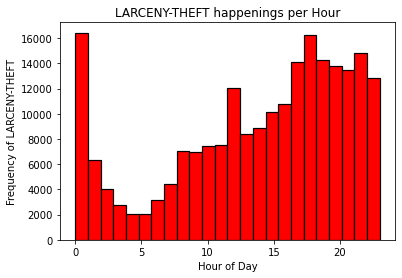

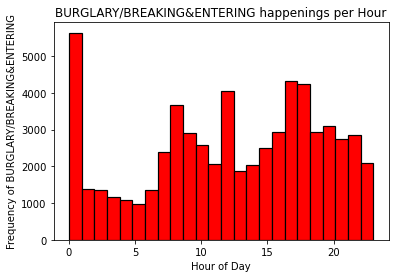

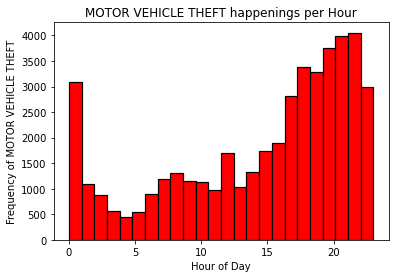

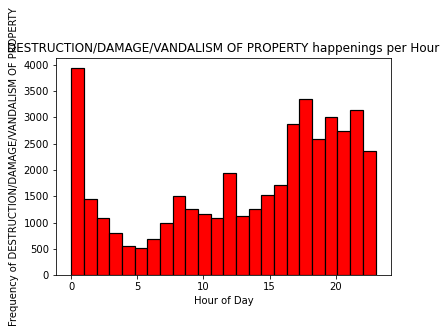

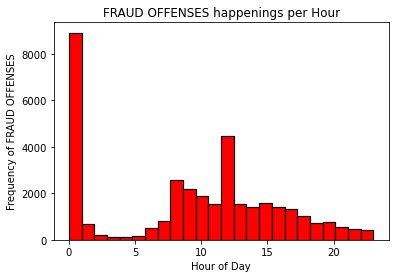

In [72]:
crimes = {}

for i in range(len(top_5_crimes)):
    crimes[top_5_crimes[i][0]] = [] 

for idx in seattleTidy.index: 
    
    t = seattleTidy.at[idx,"Offense Parent Group"]

    if t in crimes: #IF ITS A TOP CRIME TYPE
        hour = seattleTidy.at[idx, "Offense Start DateTime"].hour 
        crimes[t].append(hour)   

for i in crimes:      
    hist, bin_edges = np.histogram(crimes[i], bins=24)
    plt.hist(crimes[i],bins=24,color="red",edgecolor='black', linewidth=1.2)
    plt.ylabel("Frequency of " + i)
    plt.xlabel("Hour of Day")
    plt.title(i + " happenings per Hour")
    plt.show()


In [73]:
seattleTidy['SEASON OF OCCURENCE'] = None


for idx in seattleTidy.index:
    curr_month = seattleTidy.at[idx, "Offense Start DateTime"].month
    
    if curr_month == 12 or (1 <= curr_month and curr_month <= 2):
        seattleTidy.at[idx,'SEASON OF OCCURENCE'] = "Winter"
    elif 3 <= curr_month and curr_month <= 5:
        seattleTidy.at[idx,'SEASON OF OCCURENCE'] = "Spring"
    elif 6 <= curr_month and curr_month <= 8:
        seattleTidy.at[idx,'SEASON OF OCCURENCE'] = "Summer"
    elif 9 <= curr_month and curr_month <= 11:
        seattleTidy.at[idx,'SEASON OF OCCURENCE'] = "Fall"

seattleTidy.head()

Report Number   Offense ID Offense Start DateTime      Report DateTime  \
1   2020-044452  12605598696    2020-02-03 08:00:00  2020-02-05 10:06:28   
2   2020-044465  12605567653    2020-02-02 20:30:00  2020-02-05 09:39:33   
3   2020-044225  12605174036    2020-02-05 01:17:00  2020-02-05 03:30:55   
7   2020-044104  12605029468    2020-02-04 20:30:00  2020-02-04 23:31:52   
9   2020-044013  12605015456    2020-02-04 20:20:00  2020-02-04 22:28:09   

  Group A B Crime Against Category                      Offense Parent Group  \
1         A               PROPERTY                             LARCENY-THEFT   
2         A               PROPERTY                                   ROBBERY   
3         A               PROPERTY  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
7         A               PROPERTY  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
9         A               PROPERTY  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   

                                       Offense Precinct Sector Beat  \
1  Theft of Motor Vehicle Parts or Accessories        N      J   J3   
2                                      Robbery        N      U   U3   
3     Destruction/Damage/Vandalism of Property        W      Q   Q1   
7     Destruction/Damage/Vandalism of Property        N      J   J3   
9     Destruction/Damage/Vandalism of Property        N      U   U1   

                MCPP              100 Block Address   Longitude   Latitude  \
1  ROOSEVELT/RAVENNA       63XX BLOCK OF 5TH AVE NE -122.323399  47.675118   
2  ROOSEVELT/RAVENNA   26TH AVE NE / NE BLAKELEY ST -122.299552  47.666384   
3           MAGNOLIA        22XX BLOCK OF W RAYE ST -122.384865  47.642927   
7      PHINNEY RIDGE  71XX BLOCK OF GREENWOOD AVE N -122.355309  47.680527   
9          SANDPOINT    RAVENNA AVE NE / NE 95TH ST -122.304891  47.697564   

  SEASON OF OCCURENCE  
1              Winter  
2              Winter  
3              Winter  
7              Winter  
9              Winter

In [74]:
seattleTidy['Year Start'] = None


for idx in seattleTidy.index:
    curr_year = seattleTidy.at[idx, "Offense Start DateTime"].year
    
    seattleTidy.at[idx,'Year Start'] = curr_year


In [75]:
seattleTidy.head()

Report Number   Offense ID Offense Start DateTime      Report DateTime  \
1   2020-044452  12605598696    2020-02-03 08:00:00  2020-02-05 10:06:28   
2   2020-044465  12605567653    2020-02-02 20:30:00  2020-02-05 09:39:33   
3   2020-044225  12605174036    2020-02-05 01:17:00  2020-02-05 03:30:55   
7   2020-044104  12605029468    2020-02-04 20:30:00  2020-02-04 23:31:52   
9   2020-044013  12605015456    2020-02-04 20:20:00  2020-02-04 22:28:09   

  Group A B Crime Against Category                      Offense Parent Group  \
1         A               PROPERTY                             LARCENY-THEFT   
2         A               PROPERTY                                   ROBBERY   
3         A               PROPERTY  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
7         A               PROPERTY  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
9         A               PROPERTY  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   

                                       Offense Precinct Sector Beat  \
1  Theft of Motor Vehicle Parts or Accessories        N      J   J3   
2                                      Robbery        N      U   U3   
3     Destruction/Damage/Vandalism of Property        W      Q   Q1   
7     Destruction/Damage/Vandalism of Property        N      J   J3   
9     Destruction/Damage/Vandalism of Property        N      U   U1   

                MCPP              100 Block Address   Longitude   Latitude  \
1  ROOSEVELT/RAVENNA       63XX BLOCK OF 5TH AVE NE -122.323399  47.675118   
2  ROOSEVELT/RAVENNA   26TH AVE NE / NE BLAKELEY ST -122.299552  47.666384   
3           MAGNOLIA        22XX BLOCK OF W RAYE ST -122.384865  47.642927   
7      PHINNEY RIDGE  71XX BLOCK OF GREENWOOD AVE N -122.355309  47.680527   
9          SANDPOINT    RAVENNA AVE NE / NE 95TH ST -122.304891  47.697564   

  SEASON OF OCCURENCE Year Start  
1              Winter       2020  
2              Winter       2020  
3              Winter       2020  
7              Winter       2020  
9              Winter       2020

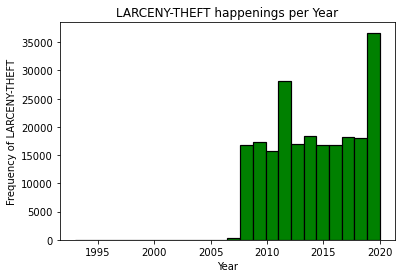

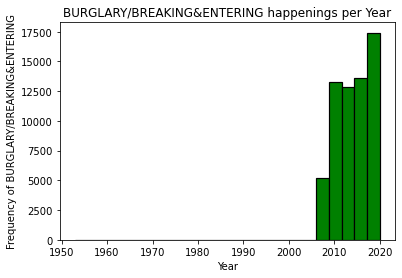

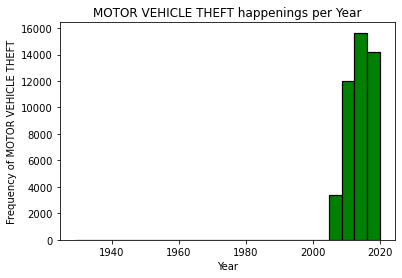

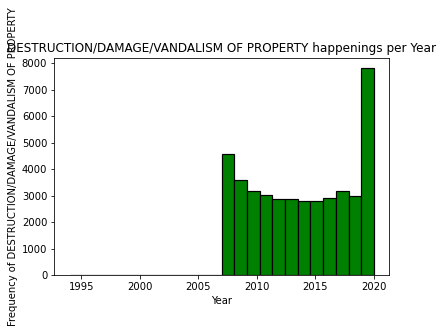

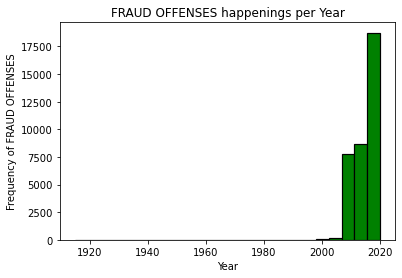

In [76]:
crimes2 = {}

for i in range(len(top_5_crimes)):
    crimes2[top_5_crimes[i][0]] = [] 

for idx in seattleTidy.index: 
    
    t = seattleTidy.at[idx,"Offense Parent Group"]

    if t in crimes2: #IF ITS A TOP CRIME TYPE
        year = seattleTidy.at[idx, "Offense Start DateTime"].year
        crimes2[t].append(year)        

for i in crimes2:      
    hist, bin_edges = np.histogram(crimes2[i], bins=24)

    plt.hist(crimes2[i],bins=24,color="green",edgecolor='black', linewidth=1.2)
    plt.ylabel("Frequency of " + i)
    plt.xlabel("Year")
    plt.title(i + " happenings per Year")
    plt.show()

In [114]:
#season_list = [['Winter'], ['Spring'], ['Summer'], ['Fall']]
 
#NEW HASH FOR TOP_5_CRIMES (JUST NAMES->NOT TUPLES)
#top_5_crimes_histo = []

#for i in top_5_crimes:
  #  top_5_crimes_histo.append(i[0])


#HASH FOR THE TYPES->SEASONS-> HOURS
#crimes_seasons_hours = {}

#for i in top_5_crimes_histo:
 #   crimes_seasons_hours[i] = {"Winter":[], "Spring":[], "Summer":[], "Fall":[]}
    
#FOR EACH SEASON, CHECK IF THE ROWS IN THE DATAFRAME HAVE A CERTAIN TYPE AND ADD THEIR HOURS ACCORDINGLY TO OUR HASH
#for season in season_list:
  #  for index,row in seattleTidy[seattleTidy["SEASON OF OCCURENCE"].isin(season)].iterrows():
     #   t = row['Offense Parent Group']
      #  if t in top_5_crimes_histo:
       #     crimes_seasons_hours[t][season[0]].append(row['Offense Start DateTime'].hour)


In [78]:
#crimes_seasons_hours

In [79]:
seattleTidy

Report Number   Offense ID Offense Start DateTime      Report DateTime  \
1        2020-044452  12605598696    2020-02-03 08:00:00  2020-02-05 10:06:28   
2        2020-044465  12605567653    2020-02-02 20:30:00  2020-02-05 09:39:33   
3        2020-044225  12605174036    2020-02-05 01:17:00  2020-02-05 03:30:55   
7        2020-044104  12605029468    2020-02-04 20:30:00  2020-02-04 23:31:52   
9        2020-044013  12605015456    2020-02-04 20:20:00  2020-02-04 22:28:09   
...              ...          ...                    ...                  ...   
874055   2020-307192  16779563026    2020-10-30 02:00:00  2020-10-30 09:59:22   
874061   2019-223685   8335129478    2019-04-01 11:52:58  2019-06-19 13:50:53   
874063   2014-122134   7699116275    2014-03-20 10:30:00  2014-04-21 15:02:00   
874065   2013-227022   7682354808    2013-06-26 11:00:00  2013-06-29 09:43:00   
874068   2010-064656   7686420892    2010-02-25 18:00:00  2010-02-26 07:54:00   

       Group A B Crime Against Category  \
1              A               PROPERTY   
2              A               PROPERTY   
3              A               PROPERTY   
7              A               PROPERTY   
9              A               PROPERTY   
...          ...                    ...   
874055         A               PROPERTY   
874061         A               PROPERTY   
874063         A               PROPERTY   
874065         A               PROPERTY   
874068         A               PROPERTY   

                            Offense Parent Group  \
1                                  LARCENY-THEFT   
2                                        ROBBERY   
3       DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
7       DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
9       DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
...                                          ...   
874055                       MOTOR VEHICLE THEFT   
874061                BURGLARY/BREAKING&ENTERING   
874063                       MOTOR VEHICLE THEFT   
874065                       MOTOR VEHICLE THEFT   
874068                       MOTOR VEHICLE THEFT   

                                            Offense Precinct Sector Beat  \
1       Theft of Motor Vehicle Parts or Accessories        N      J   J3   
2                                           Robbery        N      U   U3   
3          Destruction/Damage/Vandalism of Property        W      Q   Q1   
7          Destruction/Damage/Vandalism of Property        N      J   J3   
9          Destruction/Damage/Vandalism of Property        N      U   U1   
...                                             ...      ...    ...  ...   
874055                          Motor Vehicle Theft        N      N   N2   
874061                 Burglary/Breaking & Entering        W      D   D3   
874063                          Motor Vehicle Theft        W      D   D2   
874065                          Motor Vehicle Theft        W      Q   Q3   
874068                          Motor Vehicle Theft        W      Q   Q2   

                     MCPP              100 Block Address   Longitude  \
1       ROOSEVELT/RAVENNA       63XX BLOCK OF 5TH AVE NE -122.323399   
2       ROOSEVELT/RAVENNA   26TH AVE NE / NE BLAKELEY ST -122.299552   
3                MAGNOLIA        22XX BLOCK OF W RAYE ST -122.384865   
7           PHINNEY RIDGE  71XX BLOCK OF GREENWOOD AVE N -122.355309   
9               SANDPOINT    RAVENNA AVE NE / NE 95TH ST -122.304891   
...                   ...                            ...         ...   
874055         BITTERLAKE    140XX BLOCK OF LINDEN AVE N -122.347755   
874061        SLU/CASCADE      12XX BLOCK OF HARRISON ST -122.331070   
874063         QUEEN ANNE   27XX BLOCK OF WESTLAKE AVE N -122.347302   
874065         QUEEN ANNE          1ST AVE N / VALLEY ST -122.355386   
874068         QUEEN ANNE        26XX BLOCK OF 1ST AVE N -122.355546   

         Latitude SEASON OF OCCURENCE Year Start  
1       47.675118              Winter       2020  
2       47.6

In [80]:
crimeSeason = sorted(seattleTidy["SEASON OF OCCURENCE"].unique())
crimeSeason2=[]
tempSeason_df = seattleTidy.copy()
index = 0

for ele in crimeSeason:
    crimeSeason2.append((ele, tempSeason_df.groupby("SEASON OF OCCURENCE").count()["Offense"][0:].values[index])) 
    index += 1

#crimeSeason2 = sorted(crimeSeason2, key=lambda x: x[1], reverse = True)
crimeSeason2

    

[('Fall', 116834), ('Spring', 117270), ('Summer', 114119), ('Winter', 106137)]

In [81]:
def swapList(newList): 
    size = len(newList) 
      
    # Swapping  
    temp = newList[0] 
    newList[0] = newList[size - 1] 
    newList[size - 1] = temp 
      
    return newList 

In [82]:
lis=crimeSeason2
lis[0], lis[-1] = lis[-1], lis[0]
lis
#re order the list of seasons with number of crimes committed to correct order 

[('Winter', 106137), ('Spring', 117270), ('Summer', 114119), ('Fall', 116834)]

In [83]:
crimeSeason2Copy=lis

graphOfSeasons = [(elem1, elem2) for elem1, elem2 in crimeSeason2Copy]
for (a,b) in graphOfSeasons:

    b=b.item()
    print(type(a),type(b))

<class 'str'> <class 'int'>
<class 'str'> <class 'int'>
<class 'str'> <class 'int'>
<class 'str'> <class 'int'>


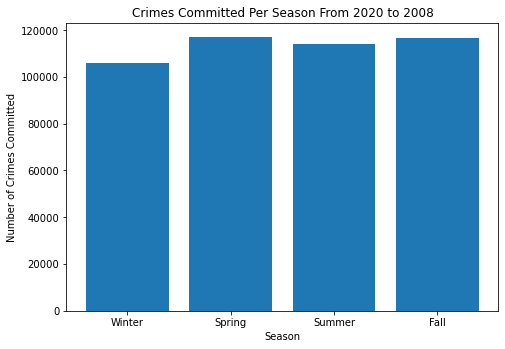

In [84]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Winter', 'Spring', 'Summer', 'Fall']
students = [106137,117270,114119,116834]
ax.bar(langs,students)
plt.title("Crimes Committed Per Season From 2020 to 2008") 
plt.xlabel("Season")
plt.ylabel("Number of Crimes Committed")
plt.show()

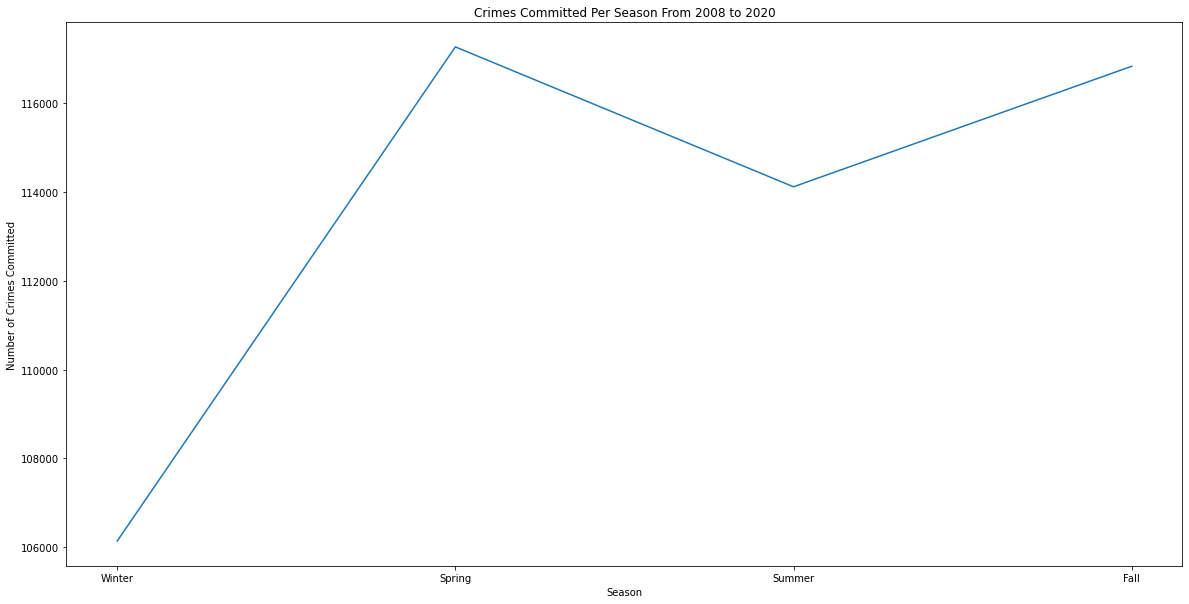

In [113]:
plt.figure(figsize=(20,10))
plt.plot(*zip(*crimeSeason2Copy))
plt.title("Crimes Committed Per Season From 2008 to 2020") 
plt.xlabel("Season")
plt.ylabel("Number of Crimes Committed")
plt.show()

In [86]:
#for cri in crimes_seasons_hours: #FOR EACH CRIME
    #multi_x = []
    #legend_season_list = []
    #weights =[]
    
    #for season in crimes_seasons_hours[cri]: #4 SEASONS FOR EACH CRIME
        #legend_season_list.append(season)
       # multi_x.append(crimes_seasons_hours[cri][season]) #years FOR THE CRIME
       # weights.append(np.ones_like(crimes_seasons_hours[cri][season])/float(len(crimes_seasons_hours[cri][season])))
   # plt.figure(figsize=(16,6))
   # plt.hist(multi_x,10,histtype = "bar",weights=weights, label=legend_season_list) #PLOT THE DATA

    #plt.title(cri + " Occurances per Year") #LABELS
    #plt.xlabel("Years " )
    #plt.ylabel("Percentage of " + cri)
    
   # plt.legend()
   # plt.show()
   
 #('LARCENY-THEFT', 220201),('BURGLARY/BREAKING&ENTERING', 62254) ('MOTOR VEHICLE THEFT', 45195), ('DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY', 42639), ('FRAUD OFFENSES', 35439)]

In [87]:
crime_copy=top_5_crimes

In [88]:
testList2 = [(elem1, elem2) for elem1, elem2 in crime_copy]
for (t,w) in testList2:

    w=w.item()
    print(type(t),type(w))

<class 'str'> <class 'int'>
<class 'str'> <class 'int'>
<class 'str'> <class 'int'>
<class 'str'> <class 'int'>
<class 'str'> <class 'int'>


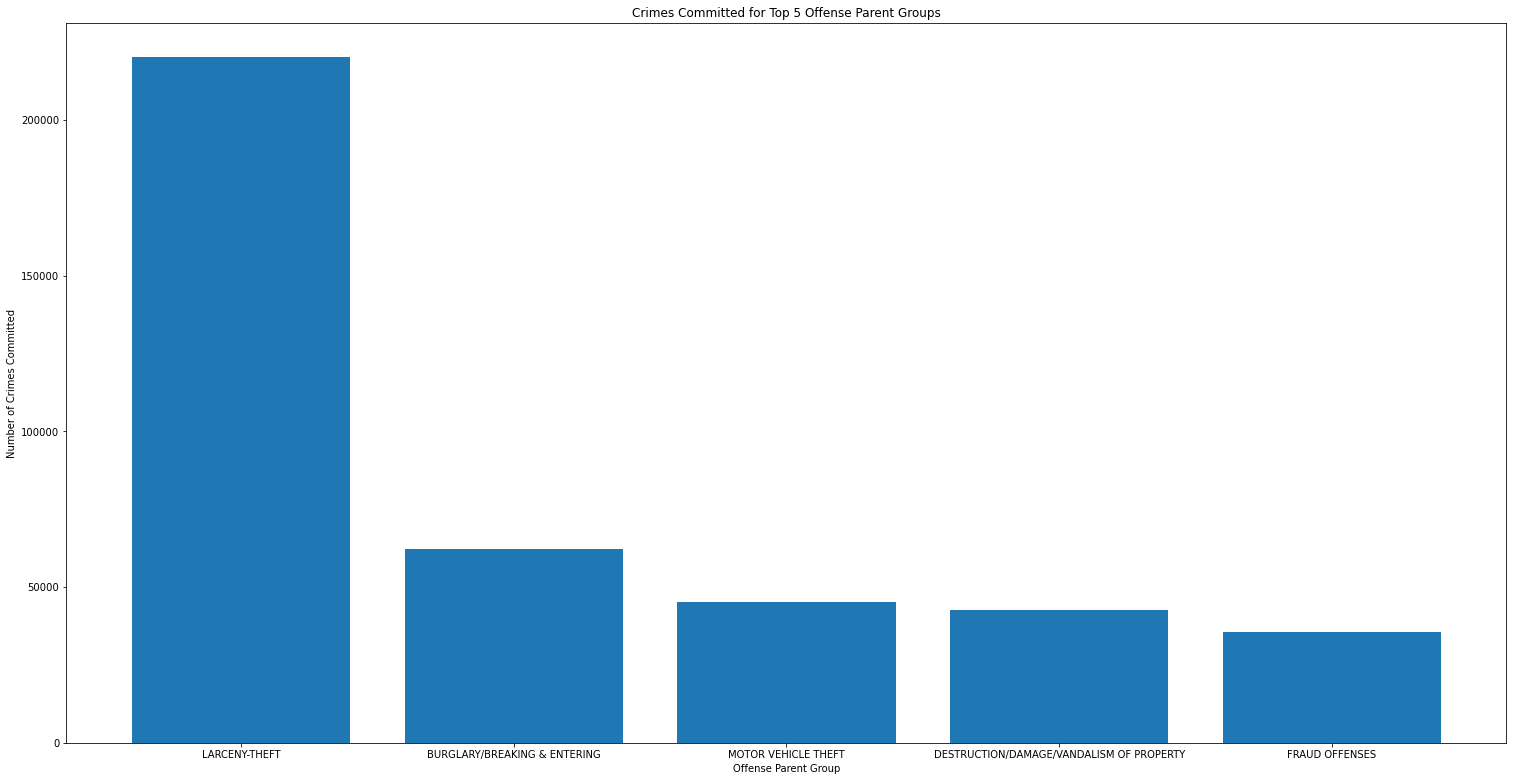

In [89]:
#plt.figure(figsize=(20,10))
fig2 = plt.figure(figsize=(20,10))
ax2 = fig2.add_axes([0,0,1,1])
TypeParentOffenseGroup = ['LARCENY-THEFT', 'BURGLARY/BREAKING & ENTERING', 'MOTOR VEHICLE THEFT', 'DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY','FRAUD OFFENSES']
numC = [220201,62254,45195,42639,35439]
ax2.bar(TypeParentOffenseGroup,numC)
plt.title("Crimes Committed for Top 5 Offense Parent Groups") 
plt.xlabel("Offense Parent Group")
plt.ylabel("Number of Crimes Committed")
plt.show()

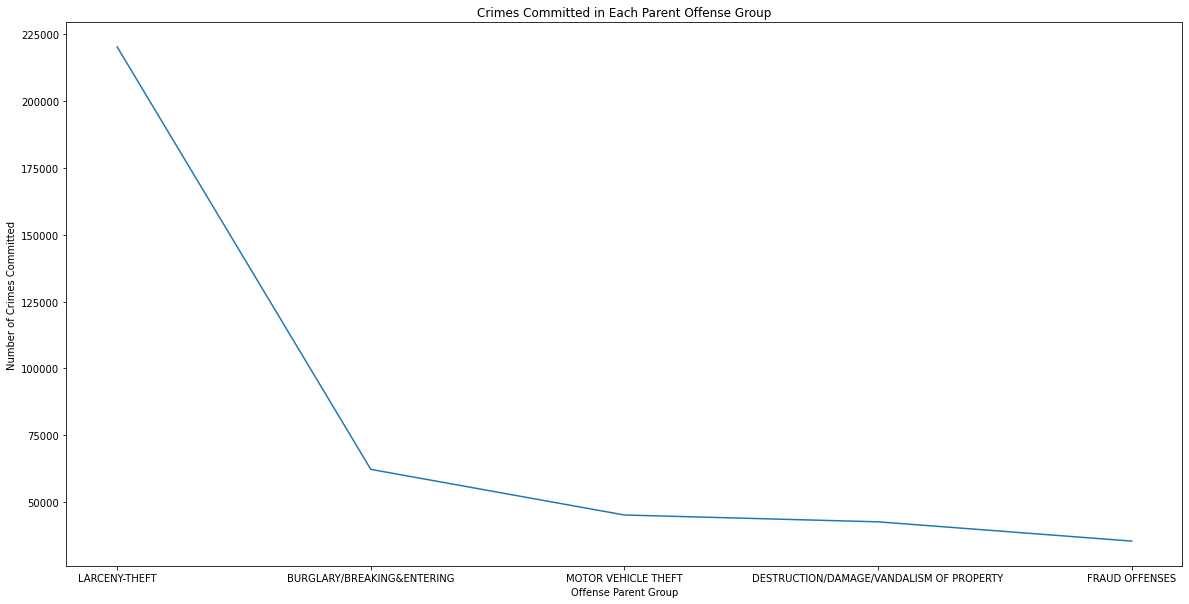

In [90]:
plt.figure(figsize=(20,10))
plt.plot(*zip(*testList2))
plt.title("Crimes Committed in Each Parent Offense Group") 
plt.xlabel("Offense Parent Group")
plt.ylabel("Number of Crimes Committed")
plt.show()

In [91]:
a=seattleTidy['Offense']
a

1         Theft of Motor Vehicle Parts or Accessories
2                                             Robbery
3            Destruction/Damage/Vandalism of Property
7            Destruction/Damage/Vandalism of Property
9            Destruction/Damage/Vandalism of Property
                             ...                     
874055                            Motor Vehicle Theft
874061                   Burglary/Breaking & Entering
874063                            Motor Vehicle Theft
874065                            Motor Vehicle Theft
874068                            Motor Vehicle Theft
Name: Offense, Length: 454360, dtype: object

In [92]:
crimewCounts = sorted(seattleTidy["Offense"].unique())
crimewCounts2=[]
tempw_df = seattleCrime.copy()
index = 0

for ele in crimewCounts:
    crimewCounts2.append((ele, tempw_df.groupby("Offense").count()["Offense Parent Group"][0:].values[index])) 
    index += 1

crimewCounts2 = sorted(crimewCounts2, key=lambda x: x[1], reverse = True)
crimewCounts2[0:10]

[('Burglary/Breaking & Entering', 95733),
 ('Destruction/Damage/Vandalism of Property', 79975),
 ('All Other Larceny', 73614),
 ('Robbery', 52191),
 ('Pornography/Obscene Material', 28505),
 ('Aggravated Assault', 27413),
 ('Drug/Narcotic Violations', 22852),
 ('Wire Fraud', 20223),
 ('Credit Card/Automated Teller Machine Fraud', 17723),
 ('Driving Under the Influence', 15813)]

In [93]:
top5Offenses=crimewCounts2[0:5]

In [94]:
top5Offenses

[('Burglary/Breaking & Entering', 95733),
 ('Destruction/Damage/Vandalism of Property', 79975),
 ('All Other Larceny', 73614),
 ('Robbery', 52191),
 ('Pornography/Obscene Material', 28505)]

In [95]:
heatMapCSV=seattleTidy
heatMapCSV.dropna(inplace=True)
heatMapCSV


Report Number   Offense ID Offense Start DateTime      Report DateTime  \
1        2020-044452  12605598696    2020-02-03 08:00:00  2020-02-05 10:06:28   
2        2020-044465  12605567653    2020-02-02 20:30:00  2020-02-05 09:39:33   
3        2020-044225  12605174036    2020-02-05 01:17:00  2020-02-05 03:30:55   
7        2020-044104  12605029468    2020-02-04 20:30:00  2020-02-04 23:31:52   
9        2020-044013  12605015456    2020-02-04 20:20:00  2020-02-04 22:28:09   
...              ...          ...                    ...                  ...   
874055   2020-307192  16779563026    2020-10-30 02:00:00  2020-10-30 09:59:22   
874061   2019-223685   8335129478    2019-04-01 11:52:58  2019-06-19 13:50:53   
874063   2014-122134   7699116275    2014-03-20 10:30:00  2014-04-21 15:02:00   
874065   2013-227022   7682354808    2013-06-26 11:00:00  2013-06-29 09:43:00   
874068   2010-064656   7686420892    2010-02-25 18:00:00  2010-02-26 07:54:00   

       Group A B Crime Against Category  \
1              A               PROPERTY   
2              A               PROPERTY   
3              A               PROPERTY   
7              A               PROPERTY   
9              A               PROPERTY   
...          ...                    ...   
874055         A               PROPERTY   
874061         A               PROPERTY   
874063         A               PROPERTY   
874065         A               PROPERTY   
874068         A               PROPERTY   

                            Offense Parent Group  \
1                                  LARCENY-THEFT   
2                                        ROBBERY   
3       DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
7       DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
9       DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
...                                          ...   
874055                       MOTOR VEHICLE THEFT   
874061                BURGLARY/BREAKING&ENTERING   
874063                       MOTOR VEHICLE THEFT   
874065                       MOTOR VEHICLE THEFT   
874068                       MOTOR VEHICLE THEFT   

                                            Offense Precinct Sector Beat  \
1       Theft of Motor Vehicle Parts or Accessories        N      J   J3   
2                                           Robbery        N      U   U3   
3          Destruction/Damage/Vandalism of Property        W      Q   Q1   
7          Destruction/Damage/Vandalism of Property        N      J   J3   
9          Destruction/Damage/Vandalism of Property        N      U   U1   
...                                             ...      ...    ...  ...   
874055                          Motor Vehicle Theft        N      N   N2   
874061                 Burglary/Breaking & Entering        W      D   D3   
874063                          Motor Vehicle Theft        W      D   D2   
874065                          Motor Vehicle Theft        W      Q   Q3   
874068                          Motor Vehicle Theft        W      Q   Q2   

                     MCPP              100 Block Address   Longitude  \
1       ROOSEVELT/RAVENNA       63XX BLOCK OF 5TH AVE NE -122.323399   
2       ROOSEVELT/RAVENNA   26TH AVE NE / NE BLAKELEY ST -122.299552   
3                MAGNOLIA        22XX BLOCK OF W RAYE ST -122.384865   
7           PHINNEY RIDGE  71XX BLOCK OF GREENWOOD AVE N -122.355309   
9               SANDPOINT    RAVENNA AVE NE / NE 95TH ST -122.304891   
...                   ...                            ...         ...   
874055         BITTERLAKE    140XX BLOCK OF LINDEN AVE N -122.347755   
874061        SLU/CASCADE      12XX BLOCK OF HARRISON ST -122.331070   
874063         QUEEN ANNE   27XX BLOCK OF WESTLAKE AVE N -122.347302   
874065         QUEEN ANNE          1ST AVE N / VALLEY ST -122.355386   
874068         QUEEN ANNE        26XX BLOCK OF 1ST AVE N -122.355546   

         Latitude SEASON OF OCCURENCE Year Start  
1       47.675118              Winter       2020  
2       47.6

In [96]:
heatMapCSV=heatMapCSV.drop("Group A B",axis=1)
heatMapCSV=heatMapCSV.drop("Precinct",axis=1)
heatMapCSV=heatMapCSV.drop("Sector",axis=1)
heatMapCSV=heatMapCSV.drop("Beat",axis=1)
heatMapCSV=heatMapCSV.drop("MCPP",axis=1)
heatMapCSV=heatMapCSV.drop("Report DateTime",axis=1)
heatMapCSV=heatMapCSV.drop("Offense ID",axis=1) 
heatMapCSV=heatMapCSV.drop("100 Block Address",axis=1)
heatMapCSV=heatMapCSV.drop("SEASON OF OCCURENCE",axis=1)
#heatMapCSV=heatMapCSV.drop("Year Start",axis=1)
heatMapCSV=heatMapCSV.drop("Report Number",axis=1)
#heatMapCSV=heatMapCSV.drop("Longitude",axis=1)
#heatMapCSV=heatMapCSV.drop("Latitude",axis=1)
#heatMapCSV=heatMapCSV.drop("Crime Against Category",axis=1)
#heatMapCSV=heatMapCSV.drop("Offense Parent Group",axis=1)
heatMapCSV.reset_index()
heatMapCSV

Offense Start DateTime Crime Against Category  \
1         2020-02-03 08:00:00               PROPERTY   
2         2020-02-02 20:30:00               PROPERTY   
3         2020-02-05 01:17:00               PROPERTY   
7         2020-02-04 20:30:00               PROPERTY   
9         2020-02-04 20:20:00               PROPERTY   
...                       ...                    ...   
874055    2020-10-30 02:00:00               PROPERTY   
874061    2019-04-01 11:52:58               PROPERTY   
874063    2014-03-20 10:30:00               PROPERTY   
874065    2013-06-26 11:00:00               PROPERTY   
874068    2010-02-25 18:00:00               PROPERTY   

                            Offense Parent Group  \
1                                  LARCENY-THEFT   
2                                        ROBBERY   
3       DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
7       DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
9       DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
...                                          ...   
874055                       MOTOR VEHICLE THEFT   
874061                BURGLARY/BREAKING&ENTERING   
874063                       MOTOR VEHICLE THEFT   
874065                       MOTOR VEHICLE THEFT   
874068                       MOTOR VEHICLE THEFT   

                                            Offense   Longitude   Latitude  \
1       Theft of Motor Vehicle Parts or Accessories -122.323399  47.675118   
2                                           Robbery -122.299552  47.666384   
3          Destruction/Damage/Vandalism of Property -122.384865  47.642927   
7          Destruction/Damage/Vandalism of Property -122.355309  47.680527   
9          Destruction/Damage/Vandalism of Property -122.304891  47.697564   
...                                             ...         ...        ...   
874055                          Motor Vehicle Theft -122.347755  47.730317   
874061                 Burglary/Breaking & Entering -122.331070  47.621970   
874063                          Motor Vehicle Theft -122.347302  47.645030   
874065                          Motor Vehicle Theft -122.355386  47.626251   
874068                          Motor Vehicle Theft -122.355546  47.643681   

       Year Start  
1            2020  
2            2020  
3            2020  
7            2020  
9            2020  
...           ...  
874055       2020  
874061       2019  
874063       2014  
874065       2013  
874068       2010  

[454360 rows x 7 columns]

In [97]:
heatMapCSV['Month of OCCURENCE'] = None


for idx in heatMapCSV.index:
    curr_month = heatMapCSV.at[idx, "Offense Start DateTime"].month
 
    if curr_month == 12:
        heatMapCSV.at[idx,'Month of OCCURENCE'] = "December"
    
    elif curr_month == 11:
        heatMapCSV.at[idx,'Month of OCCURENCE'] = "November"
    
    elif curr_month == 10:
        heatMapCSV.at[idx,'Month of OCCURENCE'] = "October"
    
    elif curr_month == 9:
        heatMapCSV.at[idx,'Month of OCCURENCE'] = "September"
    
    elif curr_month == 8:        
        heatMapCSV.at[idx,'Month of OCCURENCE'] = "August"
    
    elif curr_month == 7:
        heatMapCSV.at[idx,'Month of OCCURENCE'] = "July"
   
    elif curr_month == 6:
        heatMapCSV.at[idx,'Month of OCCURENCE'] = "June"
    elif curr_month == 5:
        heatMapCSV.at[idx,'Month of OCCURENCE'] = "May"
    elif curr_month == 4:
        heatMapCSV.at[idx,'Month of OCCURENCE'] = "April"
    elif curr_month == 3:
        heatMapCSV.at[idx,'Month of OCCURENCE'] = "March"
    elif curr_month == 2:
        heatMapCSV.at[idx,'Month of OCCURENCE'] = "February"
    elif curr_month == 1:
        heatMapCSV.at[idx,'Month of OCCURENCE'] = "January"

heatMapCSV.head()
   

Offense Start DateTime Crime Against Category  \
1    2020-02-03 08:00:00               PROPERTY   
2    2020-02-02 20:30:00               PROPERTY   
3    2020-02-05 01:17:00               PROPERTY   
7    2020-02-04 20:30:00               PROPERTY   
9    2020-02-04 20:20:00               PROPERTY   

                       Offense Parent Group  \
1                             LARCENY-THEFT   
2                                   ROBBERY   
3  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
7  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
9  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   

                                       Offense   Longitude   Latitude  \
1  Theft of Motor Vehicle Parts or Accessories -122.323399  47.675118   
2                                      Robbery -122.299552  47.666384   
3     Destruction/Damage/Vandalism of Property -122.384865  47.642927   
7     Destruction/Damage/Vandalism of Property -122.355309  47.680527   
9     Destruction/Damage/Vandalism of Property -122.304891  47.697564   

  Year Start Month of OCCURENCE  
1       2020           February  
2       2020           February  
3       2020           February  
7       2020           February  
9       2020           February

In [98]:
heatPlot=heatMapCSV
heatPlot=heatPlot.drop("Offense Start DateTime",axis=1)
heatPlot

Crime Against Category                      Offense Parent Group  \
1                    PROPERTY                             LARCENY-THEFT   
2                    PROPERTY                                   ROBBERY   
3                    PROPERTY  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
7                    PROPERTY  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
9                    PROPERTY  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
...                       ...                                       ...   
874055               PROPERTY                       MOTOR VEHICLE THEFT   
874061               PROPERTY                BURGLARY/BREAKING&ENTERING   
874063               PROPERTY                       MOTOR VEHICLE THEFT   
874065               PROPERTY                       MOTOR VEHICLE THEFT   
874068               PROPERTY                       MOTOR VEHICLE THEFT   

                                            Offense   Longitude   Latitude  \
1       Theft of Motor Vehicle Parts or Accessories -122.323399  47.675118   
2                                           Robbery -122.299552  47.666384   
3          Destruction/Damage/Vandalism of Property -122.384865  47.642927   
7          Destruction/Damage/Vandalism of Property -122.355309  47.680527   
9          Destruction/Damage/Vandalism of Property -122.304891  47.697564   
...                                             ...         ...        ...   
874055                          Motor Vehicle Theft -122.347755  47.730317   
874061                 Burglary/Breaking & Entering -122.331070  47.621970   
874063                          Motor Vehicle Theft -122.347302  47.645030   
874065                          Motor Vehicle Theft -122.355386  47.626251   
874068                          Motor Vehicle Theft -122.355546  47.643681   

       Year Start Month of OCCURENCE  
1            2020           February  
2            2020           February  
3            2020           February  
7            2020           February  
9            2020           February  
...           ...                ...  
874055       2020            October  
874061       2019              April  
874063       2014              March  
874065       2013               June  
874068       2010           February  

[454360 rows x 7 columns]

In [115]:
map_model = folium.Map(location=[47.6062, -122.331], zoom_start=11)
map_model

In [101]:
map_parentGroup=folium.Map(location=[47.6062, -122.331], zoom_start=11)
map_parentGroup

In [102]:
map_crimeAgainst=folium.Map(location=[47.6062, -122.331], zoom_start=11)
map_crimeAgainst

In [103]:
locationsCrime = heatMapCSV[['Latitude', 'Longitude']]
locationsCrime

Latitude   Longitude
1       47.675118 -122.323399
2       47.666384 -122.299552
3       47.642927 -122.384865
7       47.680527 -122.355309
9       47.697564 -122.304891
...           ...         ...
874055  47.730317 -122.347755
874061  47.621970 -122.331070
874063  47.645030 -122.347302
874065  47.626251 -122.355386
874068  47.643681 -122.355546

[454360 rows x 2 columns]

In [104]:
locationsCrimeList=locationsCrime.values.tolist()
locationsCrimeList

[[47.67511789, -122.323399063],
 [47.66638407, -122.29955218],
 [47.64292734, -122.384864805],
 [47.68052695, -122.355309065],
 [47.69756434, -122.30489081],
 [47.61468385, -122.316845012],
 [47.66247336, -122.32072010600001],
 [47.5859559, -122.315976829],
 [47.61932364, -122.320863694],
 [47.54294056, -122.32290903200001],
 [47.62394954, -122.361938917],
 [47.57140627, -122.33200668399999],
 [47.70233163, -122.33452432],
 [47.61859552, -122.353751129],
 [47.630894399999995, -122.36180477399999],
 [47.61221899, -122.308863594],
 [47.61221899, -122.308863594],
 [47.71354798, -122.34483426799999],
 [47.55638651, -122.314783435],
 [47.57999734, -122.30489459799999],
 [47.66218058, -122.313115709],
 [47.60709807, -122.30893628],
 [47.57876794, -122.329988664],
 [47.60512615, -122.33049384200001],
 [47.65912603, -122.34563939],
 [47.51654951, -122.378095285],
 [47.58323011, -122.383821146],
 [47.60291195, -122.334607817],
 [47.60169935, -122.320159539],
 [47.66007201, -122.34562812],
 [47.

In [105]:
(heatPlot['Year Start']).unique()

array([2020, 2019, 2016, 2007, 2018, 2015, 2014, 2017, 2013, 2009, 2010,
       2004, 1987, 2011, 2012, 2006, 2008, 1999, 2003, 1929, 1993, 2002,
       2005, 1995, 1991, 2001, 2000, 1998, 1997, 1994, 1996, 1980, 1992,
       1915, 1953, 1989], dtype=object)

In [106]:
(heatPlot['Crime Against Category']).unique()

array(['PROPERTY', 'SOCIETY', 'PERSON'], dtype=object)

In [107]:
(heatPlot['Offense']).unique()

array(['Theft of Motor Vehicle Parts or Accessories', 'Robbery',
       'Destruction/Damage/Vandalism of Property',
       'Theft From Motor Vehicle', 'Wire Fraud', 'Counterfeiting/Forgery',
       'Drug/Narcotic Violations', 'All Other Larceny',
       'Pornography/Obscene Material', 'Extortion/Blackmail',
       'Shoplifting', 'Motor Vehicle Theft', 'Theft From Building',
       'Driving Under the Influence', 'Stolen Property Offenses',
       'Credit Card/Automated Teller Machine Fraud', 'Identity Theft',
       'False Pretenses/Swindle/Confidence Game', 'Impersonation',
       'Weapon Law Violations', 'Hacking/Computer Invasion',
       'Embezzlement', 'Bad Checks', 'Pocket-picking',
       'Drug Equipment Violations', 'Purchasing Prostitution',
       'Purse-snatching', 'Theft From Coin-Operated Machine or Device',
       'Liquor Law Violations', 'Arson',
       'Curfew/Loitering/Vagrancy Violations', 'Prostitution',
       'Assisting or Promoting Prostitution', 'Drunkenness',
   

In [108]:
#('LARCENY-THEFT', 220201),('BURGLARY/BREAKING&ENTERING', 62254),('MOTOR VEHICLE THEFT', 45195),('DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY', 42639),('FRAUD OFFENSES', 35439)]
def isPopularOffense(offense):
    if offense == 'LARCENY-THEFT':
        return 'white'
    elif offense == 'BURGLARY/BREAKING & ENTERING':
        return 'red'
    elif offense == 'MOTOR VEHICLE THEFT':
        return 'blue'
    elif offense == 'DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY':
        return 'yellow'
    elif offense == 'FRAUD OFFENSES':
        return 'green'

In [109]:
heatPlotIT=heatPlot[0:3000]
heatPlotIT

Crime Against Category                      Offense Parent Group  \
1                  PROPERTY                             LARCENY-THEFT   
2                  PROPERTY                                   ROBBERY   
3                  PROPERTY  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
7                  PROPERTY  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
9                  PROPERTY  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
...                     ...                                       ...   
4065               PROPERTY                             LARCENY-THEFT   
4066               PROPERTY                             LARCENY-THEFT   
4067               PROPERTY                             LARCENY-THEFT   
4068               PROPERTY  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
4069               PROPERTY                             LARCENY-THEFT   

                                          Offense   Longitude   Latitude  \
1     Theft of Motor Vehicle Parts or Accessories -122.323399  47.675118   
2                                         Robbery -122.299552  47.666384   
3        Destruction/Damage/Vandalism of Property -122.384865  47.642927   
7        Destruction/Damage/Vandalism of Property -122.355309  47.680527   
9        Destruction/Damage/Vandalism of Property -122.304891  47.697564   
...                                           ...         ...        ...   
4065                     Theft From Motor Vehicle -122.327276  47.659594   
4066                     Theft From Motor Vehicle -122.267197  47.534895   
4067                     Theft From Motor Vehicle -122.355434  47.703272   
4068     Destruction/Damage/Vandalism of Property -122.350005  47.658196   
4069                            All Other Larceny -122.282696  47.696335   

     Year Start Month of OCCURENCE  
1          2020           February  
2          2020           February  
3          2020           February  
7          2020           February  
9          2020           February  
...         ...                ...  
4065       2019           December  
4066       2019           December  
4067       2019           December  
4068       2019           December  
4069       2019           December  

[3000 rows x 7 columns]

In [110]:
count_LARCENY_THEFT=0 
count_BURGLARY_BREAKING_and_ENTERING=0 
count_MOTOR_VEHICLE_THEFT=0 
count_DESTRUCTION_DAMAGE_VANDALISM_OF_PROPERTY=0 
count_FRAUD_OFFENSES=0 


for point in heatPlotIT.index:
    if heatPlotIT.loc[point]['Offense Parent Group']=='LARCENY-THEFT':
        count_LARCENY_THEFT+=1
    elif heatPlotIT.loc[point]['Offense Parent Group']=='BURGLARY/BREAKING&ENTERING':
        count_BURGLARY_BREAKING_and_ENTERING+=1
    elif heatPlotIT.loc[point]['Offense Parent Group']=='MOTOR VEHICLE THEFT':
        count_MOTOR_VEHICLE_THEFT+=1
    elif heatPlotIT.loc[point]['Offense Parent Group']=='DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY':
        count_DESTRUCTION_DAMAGE_VANDALISM_OF_PROPERTY+=1
    elif heatPlotIT.loc[point]['Offense Parent Group']=='FRAUD OFFENSES':
        count_FRAUD_OFFENSES+=1

    map_parentGroup.add_child(folium.CircleMarker(location=locationsCrimeList[point], fill='true',radius = 6,popup= 'Hi', fill_color=isPopularOffense(heatPlotIT.loc[point]['Offense Parent Group']),color = 'clear',fill_opacity=1))


map_parentGroup

In [111]:
def isCrimeAgainst(group):
    if group == 'PROPERTY':
        return 'red'
    elif group == 'SOCIETY':
        return 'green'
    elif group == 'PERSON':
        return 'blue'
    elif group == 'NOT_A_CRIME':
        return 'white'
  

In [112]:
count_PROPERTY=0 
count_SOCIETY=0 
count_PERSON=0 
count_NotACrime=0 


for point in heatPlotIT.index:
    if heatPlotIT.loc[point]['Crime Against Category']=='PROPERTY':
        count_PROPERTY+=1
    elif heatPlotIT.loc[point]['Crime Against Category']=='SOCIETY':
        count_SOCIETY+=1
    elif heatPlotIT.loc[point]['Crime Against Category']=='PERSON':
        count_PERSON+=1
    elif heatPlotIT.loc[point]['Crime Against Category']=='NOT_A_CRIME':
        count_NotACrime+=1


    map_crimeAgainst.add_child(folium.CircleMarker(location=locationsCrimeList[point], fill='true',radius = 6,popup= 'Hi', fill_color=isCrimeAgainst(heatPlotIT.loc[point]['Crime Against Category']),color = 'clear',fill_opacity=1))


map_crimeAgainst